<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

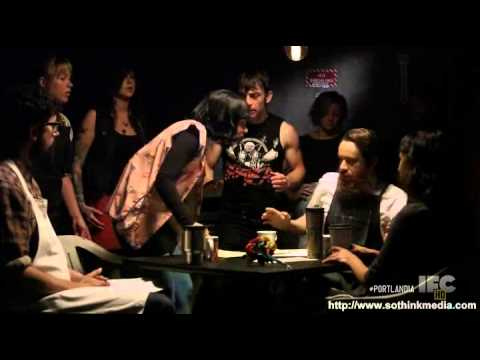

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [6]:
%pwd

'/home/jack/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [79]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [80]:
import re

# Seperating data from review
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.strip())
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.split(" ", 1))

In [81]:
# standardizing/creating
shops['date'] = shops['full_review_text'].apply(lambda x: x[0])
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('[^a-zA-Z 0-9]', '', x[1].lower()))

In [82]:
# Grabbing and casting the star rating
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[0:2]))

In [83]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere every...,5,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,12/2/2016
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the e...,4,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4,12/3/2016


In [84]:
# To do: Take regex course becasuse those expressions took way too long to figure out

In [85]:
"""
-- Spacy --
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [87]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [88]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [109]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('place', 5426),
 ('good', 3973),
 ('great', 3919),
 ('like', 3088),
 ('austin', 2252),
 ('1', 2232),
 ('checkin', 1966),
 ('love', 1935),
 ('time', 1884),
 ('nice', 1741)]

In [118]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','Coffee', 'tea', 'got', '1', 'Tea', 'ive', 'im', 'food', 'Food', ' ','coffee.', ' .', 'i', 'it', "it's", 'it.', 'the', 'this',])

In [119]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [120]:
# Split coffee shops into good and bad (based on rating)
good, bad = [x for _, x in shops.groupby(shops['star_rating'] < 4)]

In [121]:
good

,coffee_shop_name,full_review_text,star_rating,date,tokens
0,The Factory - Cafe With a Soul,1 checkin love love loved the atmosphere every...,5,11/25/2016,"[checkin, love, love, loved, atmosphere, corne..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,12/2/2016,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,1 checkin listed in brunch spots i loved the e...,4,11/30/2016,"[checkin, listed, brunch, spots, loved, eclect..."
4,The Factory - Cafe With a Soul,1 checkin they are located within the northcro...,4,12/3/2016,"[checkin, located, northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,1 checkin very cute cafe i think from the mome...,4,11/20/2016,"[checkin, cute, cafe, think, moment, stepped, ..."
...,...,...,...,...,...
7610,The Steeping Room,great food i havent had a meal i did not enjoy...,5,3/1/2016,"[great, havent, meal, enjoy, clean, great, peo..."
7611,The Steeping Room,i actually step into this restaurant by chance...,4,2/19/2015,"[actually, step, restaurant, chance, favorites..."
7612,The Steeping Room,ok the steeping room is awesome how do they ha...,5,1/21/2016,"[ok, steeping, room, awesome, great, menu, ite..."
7613,The Steeping Room,loved coming here for tea and the atmosphere w...,4,4/30/2015,"[loved, coming, atmosphere, pretty, fresh, ord..."


In [122]:
bad

,coffee_shop_name,full_review_text,star_rating,date,tokens
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2,11/25/2016,"[cool, decor, good, drinks, nice, seating, ove..."
8,The Factory - Cafe With a Soul,1 checkin ok lets try this approach pros musi...,3,10/25/2016,"[checkin, ok, lets, try, approach, pros, music..."
11,The Factory - Cafe With a Soul,the store has a decoration but honestly the co...,3,11/20/2016,"[store, decoration, honestly, good, shop, surr..."
12,The Factory - Cafe With a Soul,1 checkin listed in 2016 the third time is a ...,3,11/17/2016,"[checkin, listed, 2016, time, charm, factory, ..."
25,The Factory - Cafe With a Soul,okay so after visiting my friends in la and tr...,1,12/2/2016,"[okay, visiting, friends, la, trying, mint, mo..."
...,...,...,...,...,...
7582,The Steeping Room,i should probably give this spot 4 stars but t...,3,8/21/2014,"[probably, spot, 4, stars, main, dish, underwh..."
7583,The Steeping Room,its a lovely little tea and pastry shop but th...,2,9/13/2015,"[lovely, little, pastry, shop, service, contin..."
7590,The Steeping Room,so today i tried this place i have been in aus...,3,1/15/2015,"[today, tried, place, austin, september, list,..."
7600,The Steeping Room,great service with unimaginative and uneventfu...,2,5/10/2015,"[great, service, unimaginative, uneventful, ta..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [123]:
gwc = count(good['tokens'])
gwc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
74,place,2939,4314,1.0,0.015859,0.015859,0.478664
71,great,2492,3453,2.0,0.012694,0.028553,0.405863
202,good,2192,3096,3.0,0.011381,0.039934,0.357003
187,like,1559,2212,4.0,0.008132,0.048066,0.253909
47,austin,1547,1969,5.0,0.007238,0.055304,0.251954


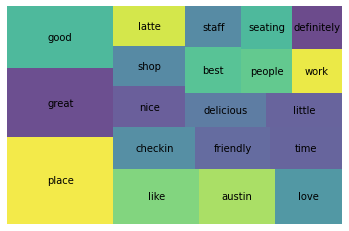

In [124]:
gwc_top20 = gwc[gwc['rank'] <= 20]

squarify.plot(sizes=gwc_top20['pct_total'], label=gwc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [125]:
bwc = count(bad['tokens'])
bwc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,place,720,1112,1.0,0.014415,0.014415,0.487805
28,good,596,877,2.0,0.011368,0.025783,0.403794
21,like,565,876,3.0,0.011355,0.037138,0.382791
205,time,353,478,4.0,0.006196,0.043335,0.239160
59,great,344,466,5.0,0.006041,0.049375,0.233062


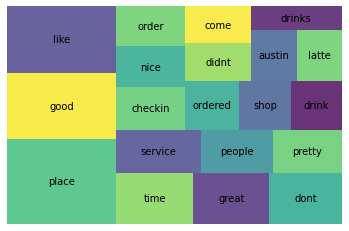

In [126]:
bwc_top20 = bwc[bwc['rank'] <= 20]

squarify.plot(sizes=bwc_top20['pct_total'], label=bwc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [127]:
# Lemmatization
sent = "This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP."

nlp = spacy.load("en_core_web_lg")

doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

This    this
is    be
the    the
start    start
of    of
our    -PRON-
NLP    NLP
adventures    adventure
.    .
We    -PRON-
started    start
here    here
with    with
Spacy    Spacy
.    .
We    -PRON-
are    be
starting    start
here    here
with    with
NLP    NLP
.    .


In [140]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [141]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [142]:
shops['lemmas'].head()

0    [checkin, love, love, love, atmosphere, corner...
1    [list, date, night, austin, ambiance, austin, ...
2    [checkin, list, brunch, spot, love, eclectic, ...
3    [cool, decor, good, drink, nice, seating, over...
4    [checkin, locate, northcross, mall, shopping, ...
Name: lemmas, dtype: object

In [143]:
# Split coffee shops into good and bad (based on rating)
lemma_good, lemma_bad = [x for _, x in shops.groupby(shops['star_rating'] < 4)]

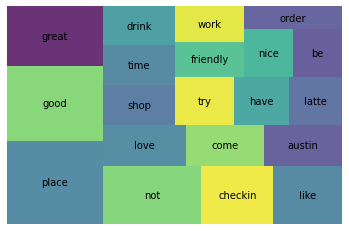

In [144]:
lgwc = count(lemma_good['lemmas'])
lgwc_top20 = lgwc[lgwc['rank'] <= 20]

squarify.plot(sizes=lgwc_top20['pct_total'], label=lgwc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

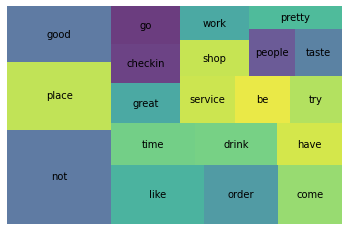

In [145]:
lbwc = count(lemma_bad['lemmas'])
lbwc_top20 = lbwc[lbwc['rank'] <= 20]

squarify.plot(sizes=lbwc_top20['pct_total'], label=lbwc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [147]:
# Good coffee shop common lemmas
lgwc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,place,3133,4816,1.0,0.017584,0.017584,0.510261
188,good,2943,4388,2.0,0.016021,0.033605,0.479316
66,great,2505,3474,3.0,0.012684,0.046289,0.407980
112,not,2187,3469,4.0,0.012666,0.058955,0.356189
23,checkin,2522,2535,5.0,0.009256,0.068211,0.410749
177,like,1668,2414,6.0,0.008814,0.077025,0.271661
1,love,1608,2121,7.0,0.007744,0.084769,0.261889
356,come,1483,1986,8.0,0.007251,0.092020,0.241531
45,austin,1547,1969,9.0,0.007189,0.099209,0.251954
18,shop,1327,1774,10.0,0.006477,0.105686,0.216124


In [146]:
# Bad coffee shop common lemma
lbwc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
128,not,868,1706,1.0,0.021931,0.021931,0.588076
33,place,755,1228,2.0,0.015786,0.037717,0.511518
29,good,648,1000,3.0,0.012855,0.050573,0.439024
21,like,592,937,4.0,0.012045,0.062618,0.401084
56,order,433,760,5.0,0.009770,0.072388,0.293360
91,come,452,650,6.0,0.008356,0.080744,0.306233
194,time,420,610,7.0,0.007842,0.088586,0.284553
5,drink,362,607,8.0,0.007803,0.096389,0.245257
101,have,345,474,9.0,0.006093,0.102482,0.233740
57,great,348,472,10.0,0.006068,0.108550,0.235772


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

